<a href="https://colab.research.google.com/github/Sunnn-y/SKhynix_Project/blob/main/FPE_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
topic_df = pd.read_csv('/content/drive/MyDrive/SK하이닉스/08. FVE 계산/피크일 별 가장 잘 설명한 토픽.csv')
topic_df

,date,|(1-FVE)|의 최소값,피크일을 가장 잘 예측한 토픽
0,20181026,0.118727,topic2
1,20181030,0.133059,topic33
2,20190124,0.022417,topic33
3,20190125,0.063293,topic33
4,20190228,0.329146,topic33
...,...,...,...
64,20230526,0.381051,topic35
65,20230530,0.175501,topic33
66,20230531,0.361625,topic20
67,20230727,0.491451,topic35


In [ ]:
FPE_df = topic_df.drop(['|(1-FVE)|의 최소값'], axis=1)
FPE_df

,date,피크일을 가장 잘 예측한 토픽
0,20181026,topic2
1,20181030,topic33
2,20190124,topic33
3,20190125,topic33
4,20190228,topic33
...,...,...
64,20230526,topic35
65,20230530,topic33
66,20230531,topic20
67,20230727,topic35


In [ ]:
FPE_df.groupby(['피크일을 가장 잘 예측한 토픽']).count()

,date
피크일을 가장 잘 예측한 토픽,
topic1,14
topic2,11
topic20,20
topic33,12
topic35,7
topic47,1
topic6,1
topic9,3


In [ ]:
pred_volume_df = pd.read_csv(f'/content/drive/MyDrive/SK하이닉스/07. LASSO 회귀/토픽별 일간 예측된 거래량/topic2_pred_volume.csv')
pred_volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1234 non-null   object 
 1   trading_volume           1234 non-null   int64  
 2   trading_volume_scaled    1234 non-null   float64
 3   news_volume              1234 non-null   float64
 4   news_volume_scaled       1234 non-null   float64
 5   pred_trading_vol_scaled  1234 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 58.0+ KB


In [ ]:
FPE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              69 non-null     int64 
 1   피크일을 가장 잘 예측한 토픽  69 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
FPE_df['date'] = pd.to_datetime(FPE_df['date'], format='%Y%m%d')
FPE_df['date'] = FPE_df['date'].dt.date
FPE_df['date'] = FPE_df['date'].astype(str)
FPE_df

,date,피크일을 가장 잘 예측한 토픽
0,2018-10-26,topic2
1,2018-10-30,topic33
2,2019-01-24,topic33
3,2019-01-25,topic33
4,2019-02-28,topic33
...,...,...
64,2023-05-26,topic35
65,2023-05-30,topic33
66,2023-05-31,topic20
67,2023-07-27,topic35


In [ ]:
FPE_df.to_csv('/content/drive/MyDrive/SK하이닉스/10. 기사 추천시스템/peakdays_dominant_topic.csv', index=False)

In [ ]:
FPE_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              69 non-null     object
 1   피크일을 가장 잘 예측한 토픽  69 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
pred_volume_df1 = pd.read_csv(f'/content/drive/MyDrive/SK하이닉스/07. LASSO 회귀/토픽별 일간 예측된 거래량/topic2_pred_volume.csv')
pred_volume_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1234 non-null   object 
 1   trading_volume           1234 non-null   int64  
 2   trading_volume_scaled    1234 non-null   float64
 3   news_volume              1234 non-null   float64
 4   news_volume_scaled       1234 non-null   float64
 5   pred_trading_vol_scaled  1234 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 58.0+ KB


In [ ]:
import numpy as np

FPE_for_topic = pd.DataFrame()

peak = FPE_df['date'].to_numpy()
topic = FPE_df['피크일을 가장 잘 예측한 토픽'].to_numpy()

for p,t in zip(peak,topic):
    pred_volume_df = pd.read_csv(f'/content/drive/MyDrive/SK하이닉스/07. LASSO 회귀/토픽별 일간 예측된 거래량/{t}_pred_volume.csv')
    pred_volume_df['date'] = pred_volume_df['date'].astype(str)
    result = pred_volume_df[pred_volume_df['date'].isin([p])]
    print(result)
    FPE_for_topic.append(result)

          date  trading_volume  trading_volume_scaled  news_volume  \
16  2018-10-26         6211406               0.279572         17.0   

    news_volume_scaled  pred_trading_vol_scaled  
16             0.53125                 0.246379  
p, t : 2018-10-26 topic2
          date  trading_volume  trading_volume_scaled  news_volume  \
18  2018-10-30         6101533               0.273454         12.0   

    news_volume_scaled  pred_trading_vol_scaled  
18                 0.5                 0.237069  
p, t : 2018-10-30 topic33
          date  trading_volume  trading_volume_scaled  news_volume  \
77  2019-01-24         6914092               0.318696         18.0   

    news_volume_scaled  pred_trading_vol_scaled  
77                0.75                 0.311551  
p, t : 2019-01-24 topic33
          date  trading_volume  trading_volume_scaled  news_volume  \
78  2019-01-25         7163871               0.332603         18.0   

    news_volume_scaled  pred_trading_vol_scaled  
78       

<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

           date  trading_volume  trading_volume_scaled  news_volume  \
364  2020-03-25         8787217               0.422987         19.0   

     news_volume_scaled  pred_trading_vol_scaled  
364            0.463415                 0.226169  
p, t : 2020-03-25 topic20
           date  trading_volume  trading_volume_scaled  news_volume  \
406  2020-05-28         9227823               0.447519         13.0   

     news_volume_scaled  pred_trading_vol_scaled  
406             0.40625                 0.209138  
p, t : 2020-05-28 topic2
           date  trading_volume  trading_volume_scaled  news_volume  \
410  2020-06-03        11642239               0.581948         16.0   

     news_volume_scaled  pred_trading_vol_scaled  
410            0.666667                 0.286724  
p, t : 2020-06-03 topic33
           date  trading_volume  trading_volume_scaled  news_volume  \
451  2020-07-30         6870841               0.316288         10.0   

     news_volume_scaled  pred_trading_vol_sca

<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

           date  trading_volume  trading_volume_scaled  news_volume  \
709  2021-08-13        11622957               0.580875         71.0   

     news_volume_scaled  pred_trading_vol_scaled  
709                 1.0                 0.386034  
p, t : 2021-08-13 topic1
           date  trading_volume  trading_volume_scaled  news_volume  \
710  2021-08-17         7851717               0.370901         32.0   

     news_volume_scaled  pred_trading_vol_scaled  
710            0.450704                 0.222382  
p, t : 2021-08-17 topic1
           date  trading_volume  trading_volume_scaled  news_volume  \
711  2021-08-18         8047599               0.381807         34.0   

     news_volume_scaled  pred_trading_vol_scaled  
711            0.478873                 0.230774  
p, t : 2021-08-18 topic1
           date  trading_volume  trading_volume_scaled  news_volume  \
774  2021-11-22         9786492               0.478625         45.0   

     news_volume_scaled  pred_trading_vol_scale

<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

topic2
            date  trading_volume  trading_volume_scaled  news_volume  \
1005  2022-10-31         6271574               0.282922         17.0   

      news_volume_scaled  pred_trading_vol_scaled  
1005            0.414634                 0.211635  
p, t : 2022-10-31 topic20
            date  trading_volume  trading_volume_scaled  news_volume  \
1051  2023-01-04         5154609               0.220732         14.0   

      news_volume_scaled  pred_trading_vol_scaled  
1051              0.4375                 0.218448  
p, t : 2023-01-04 topic2
            date  trading_volume  trading_volume_scaled  news_volume  \
1068  2023-01-31         5185088               0.222429         11.0   

      news_volume_scaled  pred_trading_vol_scaled  
1068            0.268293                 0.168036  
p, t : 2023-01-31 topic20
            date  trading_volume  trading_volume_scaled  news_volume  \
1098  2023-03-15         5357314               0.232018         25.0   

      news_volume_scaled

<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FPE_for_topic = FPE_for_topic.append(result)
<ipython-input-19-3364bec3e1b8>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

In [ ]:
fpe = FPE_for_topic.drop(['trading_volume','news_volume','news_volume_scaled'], axis=1)
fpe

,date,trading_volume_scaled,pred_trading_vol_scaled
16,2018-10-26,0.279572,0.246379
18,2018-10-30,0.273454,0.237069
77,2019-01-24,0.318696,0.311551
78,2019-01-25,0.332603,0.311551
99,2019-02-28,0.371888,0.249482
...,...,...,...
1148,2023-05-26,0.498124,0.308313
1149,2023-05-30,0.438092,0.361207
1150,2023-05-31,0.388437,0.247969
1190,2023-07-27,0.470411,0.239228


In [ ]:
fpe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 16 to 1191
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     69 non-null     object 
 1   trading_volume_scaled    69 non-null     float64
 2   pred_trading_vol_scaled  69 non-null     float64
 3   success_pred             0 non-null      object 
dtypes: float64(2), object(2)
memory usage: 2.7+ KB


In [ ]:
intercept = 0.08810285

In [ ]:
fpe['success_pred'] = (fpe['trading_volume_scaled'] - intercept)
fpe['success_pred_TF'] = fpe['pred_trading_vol_scaled'] >= fpe['success_pred']
fpe

,date,trading_volume_scaled,pred_trading_vol_scaled,success_pred,success_pred_TF
16,2018-10-26,0.279572,0.246379,0.191469,True
18,2018-10-30,0.273454,0.237069,0.185351,True
77,2019-01-24,0.318696,0.311551,0.230593,True
78,2019-01-25,0.332603,0.311551,0.244500,True
99,2019-02-28,0.371888,0.249482,0.283785,False
...,...,...,...,...,...
1148,2023-05-26,0.498124,0.308313,0.410021,False
1149,2023-05-30,0.438092,0.361207,0.349989,True
1150,2023-05-31,0.388437,0.247969,0.300334,False
1190,2023-07-27,0.470411,0.239228,0.382309,False


In [ ]:
fpe.drop(['true-pred'], axis=1, inplace=True)
fpe

,date,trading_volume_scaled,pred_trading_vol_scaled,success_pred,success_pred_TF
16,2018-10-26,0.279572,0.246379,0.191469,True
18,2018-10-30,0.273454,0.237069,0.185351,True
77,2019-01-24,0.318696,0.311551,0.230593,True
78,2019-01-25,0.332603,0.311551,0.244500,True
99,2019-02-28,0.371888,0.249482,0.283785,False
...,...,...,...,...,...
1148,2023-05-26,0.498124,0.308313,0.410021,False
1149,2023-05-30,0.438092,0.361207,0.349989,True
1150,2023-05-31,0.388437,0.247969,0.300334,False
1190,2023-07-27,0.470411,0.239228,0.382309,False


In [ ]:
success_peakdays = fpe['success_pred_TF'].sum()

In [ ]:
FPE = success_peakdays / len(peak)
FPE

0.4057971014492754

# 피크데이 시각화

In [ ]:
fpe['date'] = pd.to_datetime(fpe['date'])
fpe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 16 to 1191
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     69 non-null     datetime64[ns]
 1   trading_volume_scaled    69 non-null     float64       
 2   pred_trading_vol_scaled  69 non-null     float64       
 3   success_pred             69 non-null     float64       
 4   success_pred_TF          69 non-null     bool          
dtypes: bool(1), datetime64[ns](1), float64(3)
memory usage: 2.8 KB


In [ ]:
X = fpe['date']
y = fpe['trading_volume_scaled']
y_pred = fpe['pred_trading_vol_scaled']

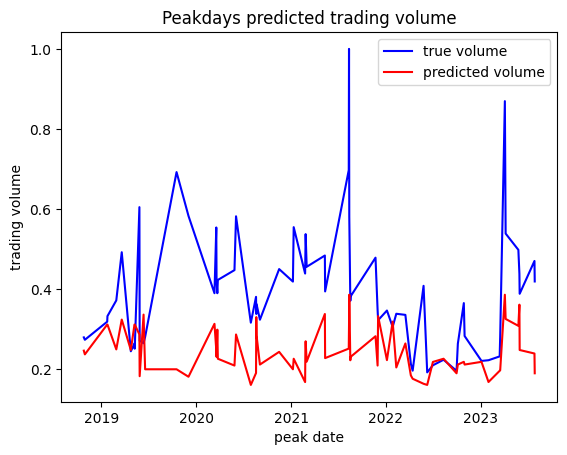

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, label='true volume', color='blue')
plt.plot(X, y_pred, label='predicted volume', color='red')
plt.xlabel('peak date')
plt.ylabel('trading volume')
plt.title('Peakdays predicted trading volume')
plt.legend()
plt.show()